# Recommendation System on Movie Datasets :

In [1]:
# Import Necessary :
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings("ignore")

In [3]:
# Read file :
user = pd.read_csv("D:\Dataset files_ML\Recommendation_system dataset/Dataset.csv")
movie = pd.read_csv("D:\Dataset files_ML\Recommendation_system dataset/Movie_Id_Titles.csv")

In [4]:
user 

,user_id,item_id,rating,timestamp
0,0,50,5,881250949
1,0,172,5,881250949
2,0,133,1,881250949
3,196,242,3,881250949
4,186,302,3,891717742
...,...,...,...,...
99998,880,476,3,880175444
99999,716,204,5,879795543
100000,276,1090,1,874795795
100001,13,225,2,882399156


In [5]:
movie

,item_id,title
0,1,Toy Story (1995)
1,2,GoldenEye (1995)
2,3,Four Rooms (1995)
3,4,Get Shorty (1995)
4,5,Copycat (1995)
...,...,...
1677,1678,Mat' i syn (1997)
1678,1679,B. Monkey (1998)
1679,1680,Sliding Doors (1998)
1680,1681,You So Crazy (1994)


In [6]:
df = pd.merge(user, movie, on="item_id")

In [7]:
df.head()

,user_id,item_id,rating,timestamp,title
0,0,50,5,881250949,Star Wars (1977)
1,290,50,5,880473582,Star Wars (1977)
2,79,50,4,891271545,Star Wars (1977)
3,2,50,5,888552084,Star Wars (1977)
4,8,50,5,879362124,Star Wars (1977)


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100003 entries, 0 to 100002
Data columns (total 5 columns):
 #   Column     Non-Null Count   Dtype 
---  ------     --------------   ----- 
 0   user_id    100003 non-null  int64 
 1   item_id    100003 non-null  int64 
 2   rating     100003 non-null  int64 
 3   timestamp  100003 non-null  int64 
 4   title      100003 non-null  object
dtypes: int64(4), object(1)
memory usage: 3.8+ MB


In [9]:
df["item_id"].value_counts()

item_id
50      584
258     509
100     508
181     507
294     485
       ... 
852       1
1505      1
1653      1
1452      1
1641      1
Name: count, Length: 1682, dtype: int64

In [10]:
df.drop("timestamp", axis=1, inplace=True)

In [11]:
df.head()

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)


In [13]:
df["item_id"].unique()

array([  50,  172,  133, ..., 1637, 1630, 1641], dtype=int64)

In [14]:
df["item_id"].value_counts().sort_values(ascending=False)

item_id
50      584
258     509
100     508
181     507
294     485
       ... 
1682      1
1659      1
1645      1
1626      1
1641      1
Name: count, Length: 1682, dtype: int64

In [15]:
# item_id madhe all value greter than 100 pahije.

new_df = df[df["item_id"].isin(df["item_id"].value_counts()[df["item_id"].value_counts() >= 100].index)]

In [16]:
new_df.index

Index([    0,     1,     2,     3,     4,     5,     6,     7,     8,     9,
       ...
       93437, 93438, 93439, 93440, 93441, 93442, 93443, 93444, 93445, 93446],
      dtype='int64', length=64822)

In [17]:
new_df["item_id"].value_counts()

item_id
50      584
258     509
100     508
181     507
294     485
       ... 
708     101
682     100
1012    100
381     100
665     100
Name: count, Length: 338, dtype: int64

In [18]:
new_df["item_id"].unique()

array([  50,  172,  133,  242,  302,  346,  474,  265,  451,   86,  257,
        222,   29,  274,  144,  118,    1,  546,   95,  234,  246,   98,
        193,   88,  194,  603,  304,  327,  241,    4,  332,  100,  432,
        322,  181,  196,  679,  143,  423,  515,  288,  219,  526,  232,
        427,   15,  690,  248,  229,  237,  480,   54,  403,  111,   25,
       1016,  154,  275,  498,  382,  209,   23,  294,  208,  685,  328,
        496,  132,  174,   96,  151,  307,  514,  485,  317,  195,  200,
        385,  750,  264,  245,  135,  471,  815,  479,  272,  756,   14,
        419,  405,  504,  268,  117,  273,  559,  323,  177,  231,    2,
        137,  164,  281,  298,  443,   79,  258,  455,  216,   48,   77,
        476,  483,  748,  255,  202,  408,  235,  228,  347,  178,  478,
        127,   69,  214, 1028,  554,  109,  318,  568,   65,  591,  746,
         68,    7,  218,   56,   89,  153,  367,   11,  520,   82,  501,
        198,  705,   64,  357,  484,  508,  303,  2

In [19]:
new_df

,user_id,item_id,rating,title
0,0,50,5,Star Wars (1977)
1,290,50,5,Star Wars (1977)
2,79,50,4,Star Wars (1977)
3,2,50,5,Star Wars (1977)
4,8,50,5,Star Wars (1977)
...,...,...,...,...
93442,820,358,1,Spawn (1997)
93443,397,358,2,Spawn (1997)
93444,827,358,2,Spawn (1997)
93445,757,358,3,Spawn (1997)


In [20]:
new_df["rating"].unique()

array([5, 4, 2, 3, 1], dtype=int64)

In [21]:
# Find mean :
new_df["rating"].mean()

3.699962975532998

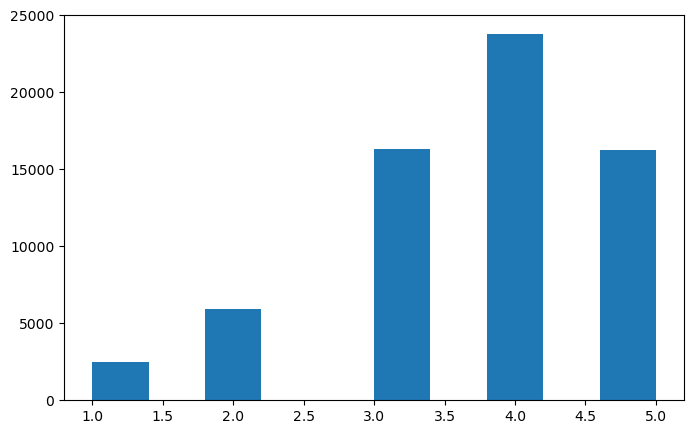

In [22]:
plt.figure(figsize=[8,5])
plt.hist(new_df["rating"])
plt.show()

In [23]:
movie_title = new_df.groupby("item_id")
movie_title

In [24]:
movie_title["rating"].mean()

item_id
1       3.878319
2       3.206107
4       3.550239
7       3.798469
8       3.995434
          ...   
928     3.115385
1012    3.530000
1016    3.459854
1028    3.040541
1047    2.835821
Name: rating, Length: 338, dtype: float64

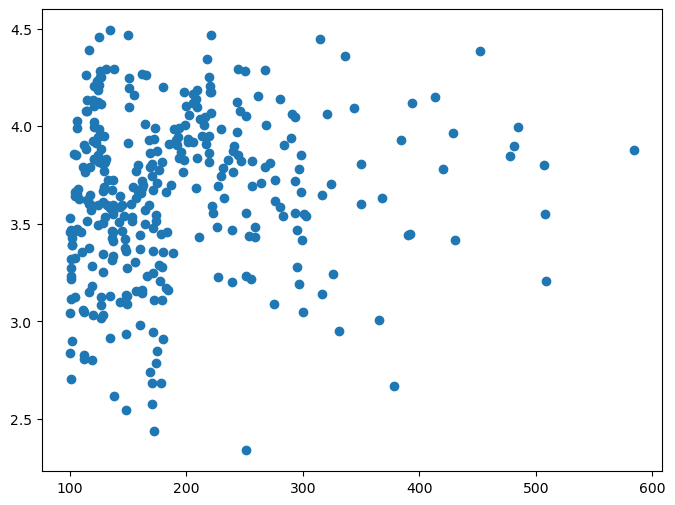

In [25]:
plt.figure(figsize=[8,6])
plt.scatter(new_df["item_id"].value_counts(), movie_title["rating"].mean())
plt.show()

In [26]:
import seaborn as sns

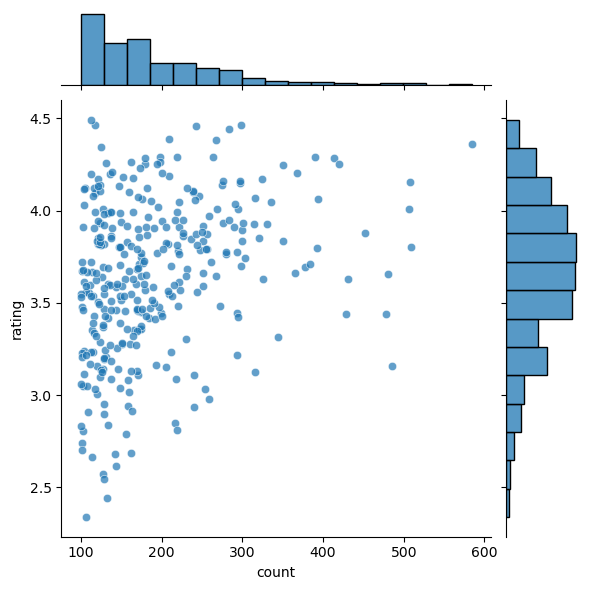

In [27]:
sns.jointplot(new_df, x=new_df["item_id"].value_counts(), y=movie_title["rating"].mean(), alpha=0.7)
plt.show()

In [28]:
movie_matrix = pd.pivot_table(df, columns="title", index="user_id", values="rating", fill_value=0)
movie_matrix 

title,'Til There Was You (1997),1-900 (1994),101 Dalmatians (1996),12 Angry Men (1957),187 (1997),2 Days in the Valley (1996),"20,000 Leagues Under the Sea (1954)",2001: A Space Odyssey (1968),3 Ninjas: High Noon At Mega Mountain (1998),"39 Steps, The (1935)",...,Yankee Zulu (1994),Year of the Horse (1997),You So Crazy (1994),Young Frankenstein (1974),Young Guns (1988),Young Guns II (1990),"Young Poisoner's Handbook, The (1995)",Zeus and Roxanne (1997),unknown,Á köldum klaka (Cold Fever) (1994)
user_id,,,,,,,,,,,,,,,,,,,,,
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,2,5,0,0,3,4,0,0,...,0,0,0,5,3,0,0,0,4,0
2,0,0,0,0,0,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,2,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
939,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
940,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
941,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [29]:
movie_corr = movie_matrix.corr(method="pearson")

In [35]:
movie_title = "Welcome to the Dollhouse (1995)"

In [31]:
similar_movie = movie_corr[movie_title]

In [32]:
data = {'title':similar_movie.index , 'Similarity':similar_movie.values}

In [33]:
similar_welcome = pd.DataFrame(data)

In [34]:
similar_welcome.sort_values('Similarity', ascending=False)

,title,Similarity
1609,Welcome to the Dollhouse (1995),1.000000
1524,Trainspotting (1996),0.399663
212,Bound (1996),0.349699
724,I Shot Andy Warhol (1996),0.344619
309,"City of Lost Children, The (1995)",0.338118
...,...,...
649,Half Baked (1998),-0.042415
794,Jungle2Jungle (1997),-0.048114
854,Leave It to Beaver (1997),-0.051850
1576,Vegas Vacation (1997),-0.055044
